In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
clean_short_df = pd.read_csv("../../Desktop/CleanedAustinCrimeReport.csv")

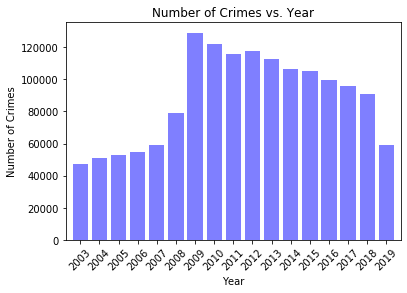

In [3]:
# Using the cleaned Austin crime data, we're plotting the number of crimes vs. years bar graph.

crime_per_year_df = pd.DataFrame(clean_short_df["occ_year"].value_counts())
crime_per_year_df = crime_per_year_df.reset_index()
crime_per_year_df = crime_per_year_df.rename(columns={"occ_year":"number_of_crimes", "index":"year"})
crime_per_year_df = crime_per_year_df.sort_values('year')
years = []
for index,row in crime_per_year_df.iterrows():
    years.append(row["year"])
x_axis = np.arange(len(years))
plt.bar(x_axis,crime_per_year_df["number_of_crimes"],color='b', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, years, rotation=45)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.title("Number of Crimes vs. Year")
plt.show()

In [4]:
# Since there is a big jump in number of crimes from 2008 to 2009, we wondered if this could be a result of cleaning data
# process (Is is possible datas from earlier years had more NaN values therefore most of the drops from those years?)
# So, we decided to plot crime vs. year graph for the full data set.

occ_date_df = pd.read_csv("../../Desktop/FullAustinCrime_occ_year_month_day_Report.csv")

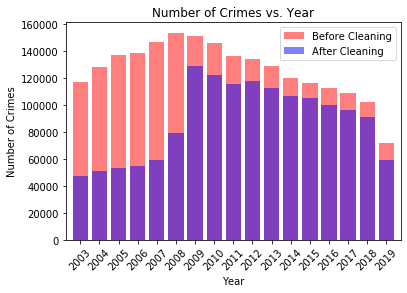

In [18]:
# Plotting the number of crimes vs. years bar graph for full Austin crime data set. 

full_crime_per_year_df = pd.DataFrame(occ_date_df["occ_year"].value_counts())
full_crime_per_year_df = full_crime_per_year_df.reset_index()
full_crime_per_year_df = full_crime_per_year_df.rename(columns={"occ_year":"number_of_crimes", "index":"year"})
full_crime_per_year_df = full_crime_per_year_df.sort_values('year')
years = []
for index,row in full_crime_per_year_df.iterrows():
    years.append(row["year"])
x_axis = np.arange(len(years))
plt.bar(x_axis,full_crime_per_year_df["number_of_crimes"],color='r', alpha=0.5, align="center", label="Before Cleaning")
plt.bar(x_axis,crime_per_year_df["number_of_crimes"],color='b', alpha=0.5, align="center",label="After Cleaning")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, years, rotation=45)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.title("Number of Crimes vs. Year")
plt.legend(loc="upper right")
plt.show()

In [6]:
population_df = pd.read_csv("../../Desktop/AustinPopulation2003-2016.csv")

In [7]:
full_crime_per_year_df["year"] = full_crime_per_year_df["year"].astype(int)
full_crime_per_year_df = pd.merge(full_crime_per_year_df,population_df,how="left", on="year")

In [8]:
# There is no population information for years 2017, 2018 and 2019.
full_crime_per_year_df = full_crime_per_year_df.dropna()

In [9]:
full_crime_per_year_df["crime_pop_perc_ration"] = 100 * full_crime_per_year_df["number_of_crimes"]/full_crime_per_year_df["austin_population"]

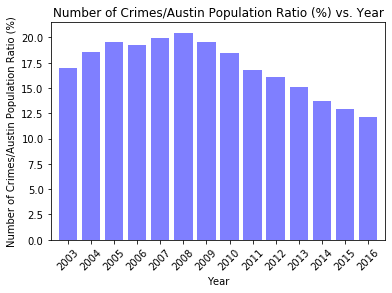

In [10]:
years = []
for index,row in full_crime_per_year_df.iterrows():
    years.append(int(row["year"]))
x_axis = np.arange(len(years))
plt.bar(x_axis,full_crime_per_year_df["crime_pop_perc_ration"],color='b', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, years, rotation=45)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.xlabel("Year")
plt.ylabel("Number of Crimes/Austin Population Ratio (%)")
plt.title("Number of Crimes/Austin Population Ratio (%) vs. Year")
plt.show()

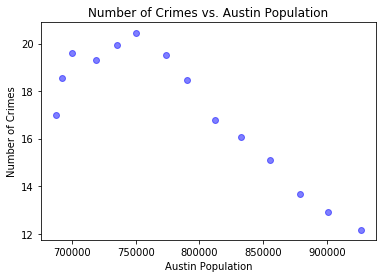

In [11]:
plt.scatter(full_crime_per_year_df["austin_population"],full_crime_per_year_df["crime_pop_perc_ration"],color='b', alpha=0.5)
plt.xlabel("Austin Population")
plt.ylabel("Number of Crimes")
plt.title("Number of Crimes vs. Austin Population")
plt.show()

In [12]:
crime_peak = full_crime_per_year_df["number_of_crimes"].max()
full_crime_per_year_df["normalized_number_of_crimes"] = round(full_crime_per_year_df["number_of_crimes"]/crime_peak,2)
percent_peak = full_crime_per_year_df["crime_pop_perc_ration"].max()
full_crime_per_year_df["normalized_percentages"] = round(full_crime_per_year_df["crime_pop_perc_ration"]/percent_peak,2)
full_crime_per_year_df

,year,number_of_crimes,austin_population,crime_pop_perc_ration,normalized_number_of_crimes,normalized_percentages
0,2003,116967,687708.0,17.008236,0.76,0.83
1,2004,128445,692102.0,18.558681,0.84,0.91
2,2005,137203,700407.0,19.589039,0.89,0.96
3,2006,138708,718912.0,19.294156,0.90,0.94
4,2007,146483,735088.0,19.927274,0.95,0.97
5,2008,153560,750525.0,20.460344,1.00,1.00
6,2009,150930,774037.0,19.499068,0.98,0.95
7,2010,146109,790390.0,18.485684,0.95,0.90
8,2011,136230,812025.0,16.776577,0.89,0.82
9,2012,133865,832326.0,16.083241,0.87,0.79


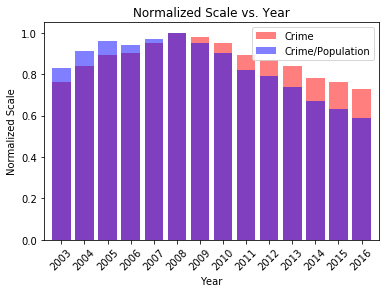

In [13]:
years = []
for index,row in full_crime_per_year_df.iterrows():
    years.append(int(row["year"]))
x_axis = np.arange(len(years))
plt.bar(x_axis,full_crime_per_year_df["normalized_number_of_crimes"],color='r', alpha=0.5, align="center",label="Crime")
plt.bar(x_axis,full_crime_per_year_df["normalized_percentages"],color='b', alpha=0.5, align="center",label="Crime/Population")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, years, rotation=45)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.xlabel("Year")
plt.ylabel("Normalized Scale")
plt.title("Normalized Scale vs. Year")
plt.legend(loc="upper right")
plt.show()

In [14]:
crime_per_month_df = pd.DataFrame(occ_date_df["occ_month"].value_counts())
crime_per_month_df = crime_per_month_df.reset_index()
crime_per_month_df = crime_per_month_df.rename(columns={"occ_month":"number_of_crimes", "index":"month"})
crime_per_month_df = crime_per_month_df.sort_values('month')

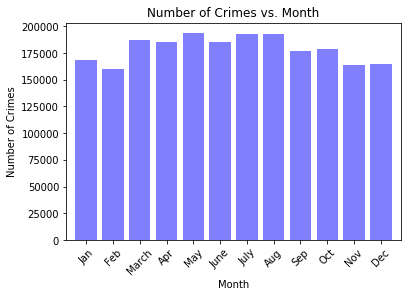

In [15]:
months = ["Jan","Feb","March","Apr","May","June","July","Aug","Sep","Oct","Nov","Dec"]
x_axis = np.arange(len(months))
plt.bar(x_axis, crime_per_month_df["number_of_crimes"],color='b', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, months, rotation=45)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.xlabel("Month")
plt.ylabel("Number of Crimes")
plt.title("Number of Crimes vs. Month")
plt.show()

In [16]:
# Here we divide the day into 4 parts and count the number of crimes in each part. 

bins = [0, 559, 1159, 1759, 2359]
group_names = ["12:000AM-5:59AM", "6:00AM-11:59AM", "12:00PM-5:59PM", "6:00PM-11:59PM"]

occ_date_df["occ_time_quarter"] = pd.cut(occ_date_df["occ_time"], bins=bins, labels=group_names)
crime_time_quarter_df = pd.DataFrame(occ_date_df["occ_time_quarter"].value_counts())
crime_time_quarter_df = crime_time_quarter_df.reset_index()
crime_time_quarter_df = crime_time_quarter_df.rename(columns={"occ_time_quarter":"number_of_crimes",
                                                              "index":"Quarter"})
crime_time_quarter_df

,Quarter,number_of_crimes
0,6:00PM-11:59PM,742894
1,12:00PM-5:59PM,614172
2,12:000AM-5:59AM,404555
3,6:00AM-11:59AM,355462


C:\Users\dunda\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


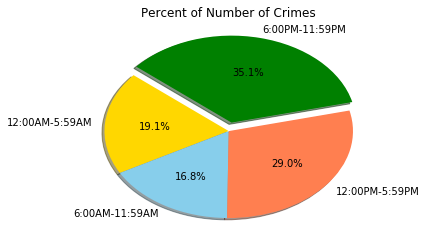

In [17]:
labels = ["12:00AM-5:59AM", "6:00AM-11:59AM", "12:00PM-5:59PM", "6:00PM-11:59PM"]
sizes = [crime_time_quarter_df.iat[2,1], crime_time_quarter_df.iat[3,1], 
         crime_time_quarter_df.iat[1,1], crime_time_quarter_df.iat[0,1]] 
         
colors = ["gold", "skyblue", "coral","green"]
explode = (0, 0, 0, 0.1)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Percent of Number of Crimes")
plt.axes().set_aspect(0.7)
plt.show()

In [ ]:
# crime_per_zipcode_df = pd.DataFrame(clean_short_df["zip_code"].value_counts())
# crime_per_zipcode_df = crime_per_zipcode_df.reset_index()
# crime_per_zipcode_df = crime_per_zipcode_df.rename(columns={"zip_code":"number_of_crimes", "index":"zipcode"})

# # zipcode_list = []
# # for index,row in crime_per_zipcode_df.iterrows():
# #     zipcode_list.append(row["zipcode"])

# plt.bar(crime_per_zipcode_df["zipcode"],crime_per_zipcode_df["number_of_crimes"])
# plt.xlabel("Zipcode")
# plt.ylabel("# of crimes")
# plt.title("Number of Crimes vs. Zipcode")
# plt.show()

In [36]:
coordinates_df = pd.read_csv("../../Desktop/FullAustinCrime_coordinates_Report.csv")
grouped_coordinates_df = coordinates_df.groupby(['council_district'])
latitudes_df = pd.DataFrame(grouped_coordinates_df.describe()["latitude"]["mean"])
latitudes_df = latitudes_df.reset_index()
latitudes_df = latitudes_df.rename(columns={"mean":"lat"})
longitudes_df = pd.DataFrame(grouped_coordinates_df.describe()["longitude"]["mean"])
longitudes_df = longitudes_df.reset_index()
longitudes_df = longitudes_df.rename(columns={"mean":"lng"})
cd_coordinates_df = pd.merge(latitudes_df,longitudes_df, how="left", on="council_district")
count_df = pd.DataFrame(grouped_coordinates_df.describe()["longitude"]["count"])
count_df = count_df.reset_index()
count_df = count_df.rename(columns={"count":"number_of_crimes"})
cd_coordinates_df = pd.merge(cd_coordinates_df,count_df, how="left", on="council_district")
cd_coordinates_df

,council_district,lat,lng,number_of_crimes
0,1.0,30.302576,-97.684040,256378.0
1,2.0,30.192327,-97.746656,206698.0
2,3.0,30.237156,-97.729360,350016.0
3,4.0,30.348671,-97.700277,313934.0
4,5.0,30.204706,-97.800473,158166.0
5,6.0,30.446745,-97.784922,88525.0
6,7.0,30.386262,-97.709156,193225.0
7,8.0,30.230726,-97.841964,83263.0
8,9.0,30.275193,-97.738862,343856.0
9,10.0,30.360519,-97.762320,84548.0


In [35]:
del cd_coordinates_df

In [ ]:
crime_per_cd_df = pd.DataFrame(df["council_district"].value_counts())
crime_per_cd_df = crime_per_cd_df.reset_index()
crime_per_cd_df = crime_per_cd_df.rename(columns={"council_district":"number_of_crimes", "index":"c_district"})
crime_per_cd_df

In [ ]:
plt.bar(crime_per_cd_df["c_district"],crime_per_cd_df["number_of_crimes"])
plt.xlabel("Council District")
plt.ylabel("# of crimes")
plt.title("Number of Crimes vs. Council District")
plt.show()